**Reinforcement Learning:** Reinforcement learning is a framework for solving control tasks (also called decision problems) by building agents that learn from the environment by interacting with it through trial and error and receiving rewards (positive or negative) as unique feedback.



**Deep** in Deep Reinforcement learning: Deep Reinforcement Learning introduces deep neural networks to solve Reinforcement Learning problems — hence the name “deep”.

**Deep neural networks:** A deep neural network (DNN) is a type of artificial neural network with multiple hidden layers between the input and output layers. These layers allow the network to learn complex patterns and representations from data, making it suitable for tasks like image recognition, natural language processing.








Deep neural networks are popular because they are in many cases the most accurate parametric machine learning models for a given task, like image classification.

If we have some 2-dimensional data, we can start with a randomly initialized set of parameters, such as [m = 3.4, b = 0.3], and then use a training algorithm to optimize the parameters to fit the training data, in which case the optimal set of parameters is close to [m = 2, b = 1]


 Video game screen might be input data for an RL algorithm, which then decides which action to take using the game controller, and this causes the game to update (e.g. the player moves or fires a weapon).


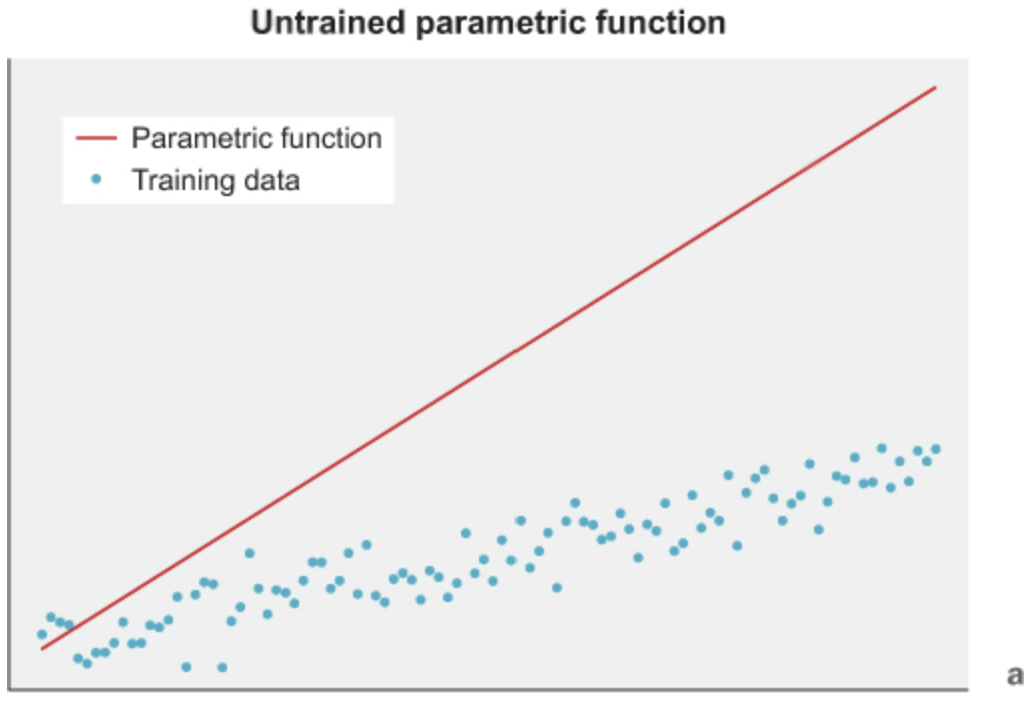

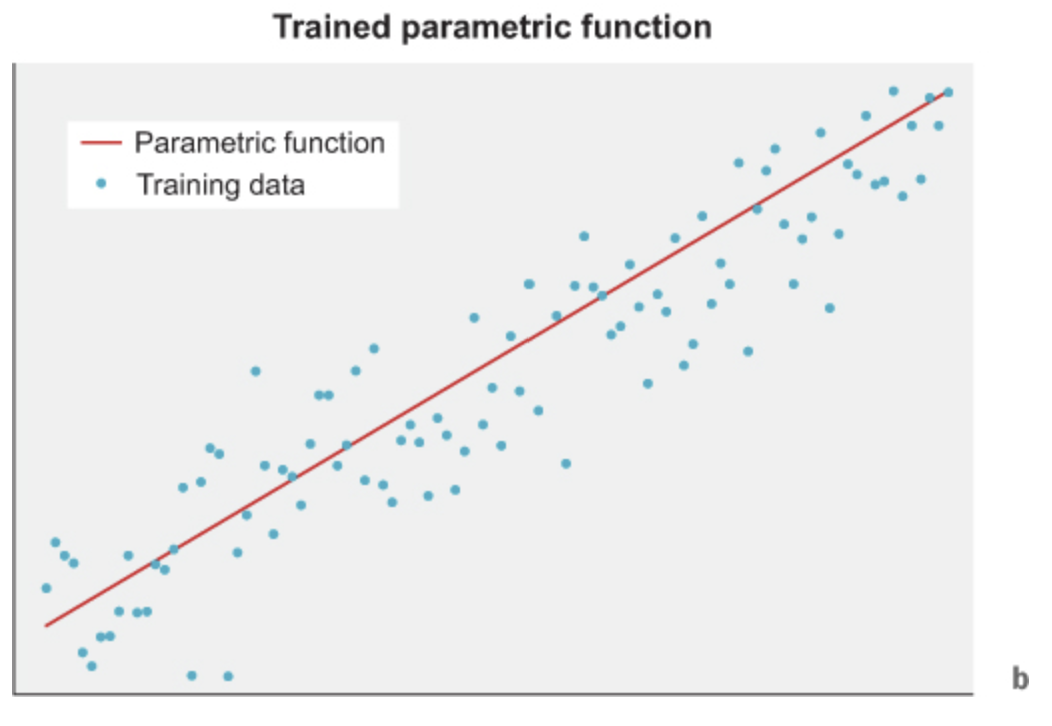

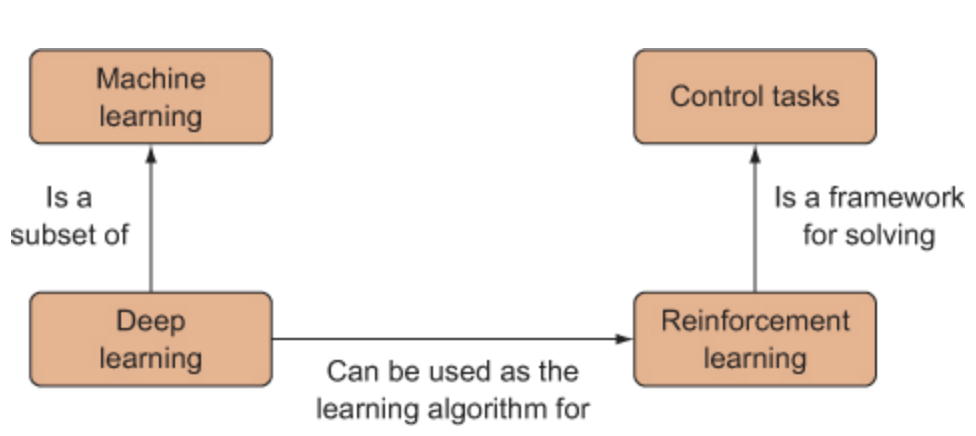

The data exists in both time and space. This means that what the algorithm decides at one time is influenced by what happened at a previous time.

The dataset upon which the algorithm is training is not necessarily fixed but changes based on the decisions the algorithm makes.




Ordinary image classification-like tasks fall under the category of supervised learning, because the algorithm is trained on how to properly classify images by giving it the right answers. The algorithm at first takes random guesses, and it is iteratively corrected until it learns the features in the image that correspond to the appropriate label. This requires us to already know what the right answers are, which can be cumbersome. If you want to train a deep learning algorithm to correctly classify images of various species of plants, you would have to painstakingly acquire thousands of such images and manually associate class labels with each one and prepare the data in a format that a machine learning algorithm can operate on, generally some type of matrix.

In contrast, in RL we don’t know exactly what the right thing to do is at every step. We just need to know what the ultimate goal is and what things to avoid doing.

We train an RL algorithm by incentivizing it to accomplish some high-level goal and possibly disincentivize it from doing things we don’t want it to do. In the case of a self-driving car, the high-level goal might be “get to point B from starting point A without crashing.” If it accomplishes the task, we reward it, and if it crashes, we penalize it. We would do this all in a simulator, rather than out on the real roads, so we could let it repeatedly try and fail at the task until it learns and gets rewarded.

In natural language, “reward” always means something positive, whereas in reinforcement learning jargon, it is a numeric quantity to be optimized. Thus, a reward can be positive or negative (penalty).

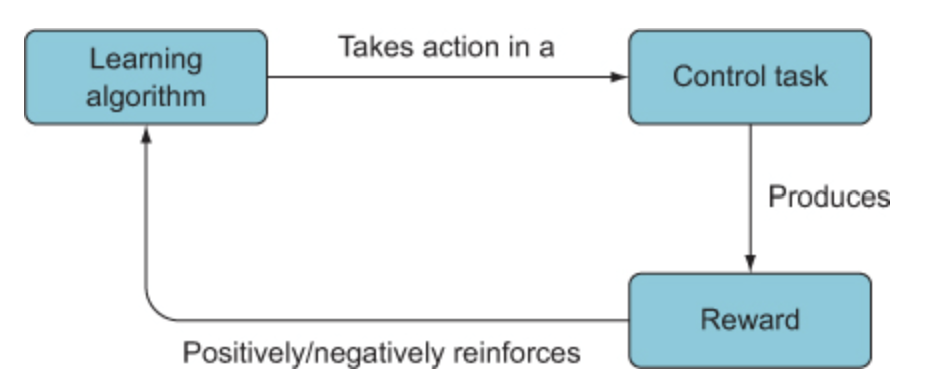

Dynamic programming might better be called goal decomposition as it solves complex high-level problems by decomposing them into smaller and smaller subproblems until it gets to a simple subproblem that can be solved without further information.

DP can be considered one extreme of a continuum of problem-solving techniques, where the other end would be random trial and error.

The trial and error strategy generally falls under the umbrella of Monte Carlo methods. A Monte Carlo method is essentially a random sampling from the environment. In many real-world problems, we have at least some knowledge of how the environment works, so we end up employing a mixed strategy of some amount of trial and error and some amount of exploiting what we already know about the environment to directly solve the easy sub-objectives.

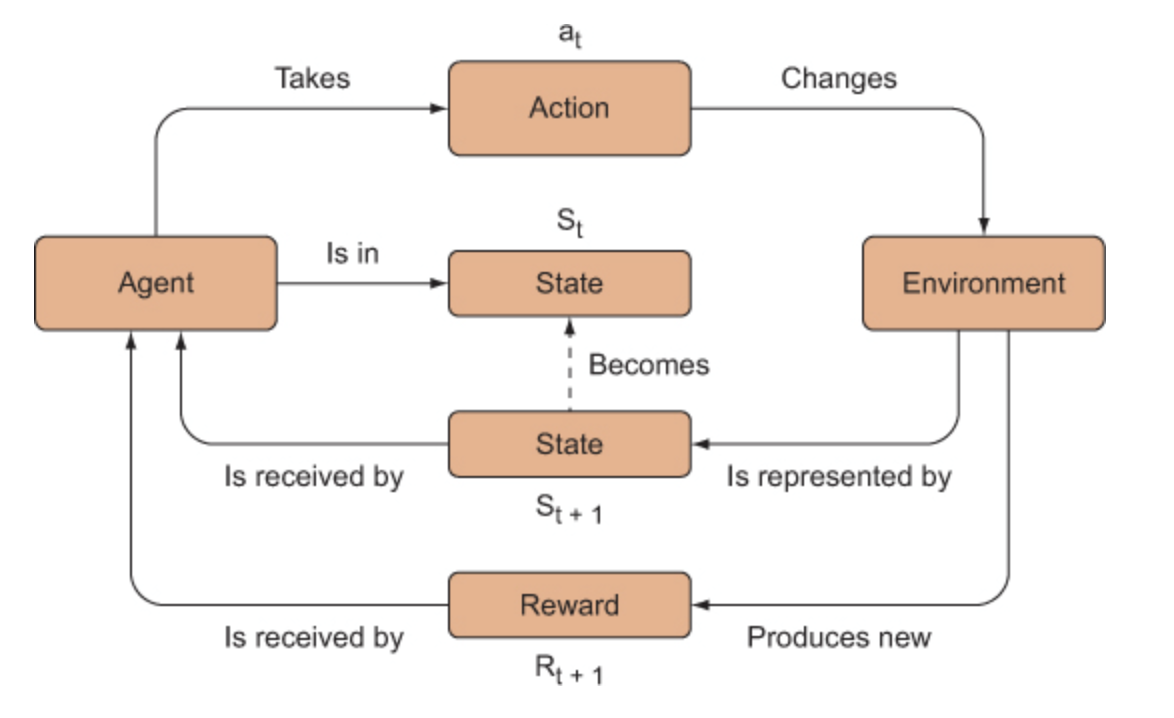

The framework of RL algorithm

The general pipeline for an RL algorithm is a loop in which the agent receives input data (the state of the environment), the agent evaluates that data and takes an action from a set of possible actions given its current state, the action changes the environment, and the environment then sends a reward signal and new state information to the agent. Then the cycle repeats. When the agent is implemented as a deep neural network, each iteration evaluates a loss function based on the reward signal and backpropagates to improve the performance of the agent.

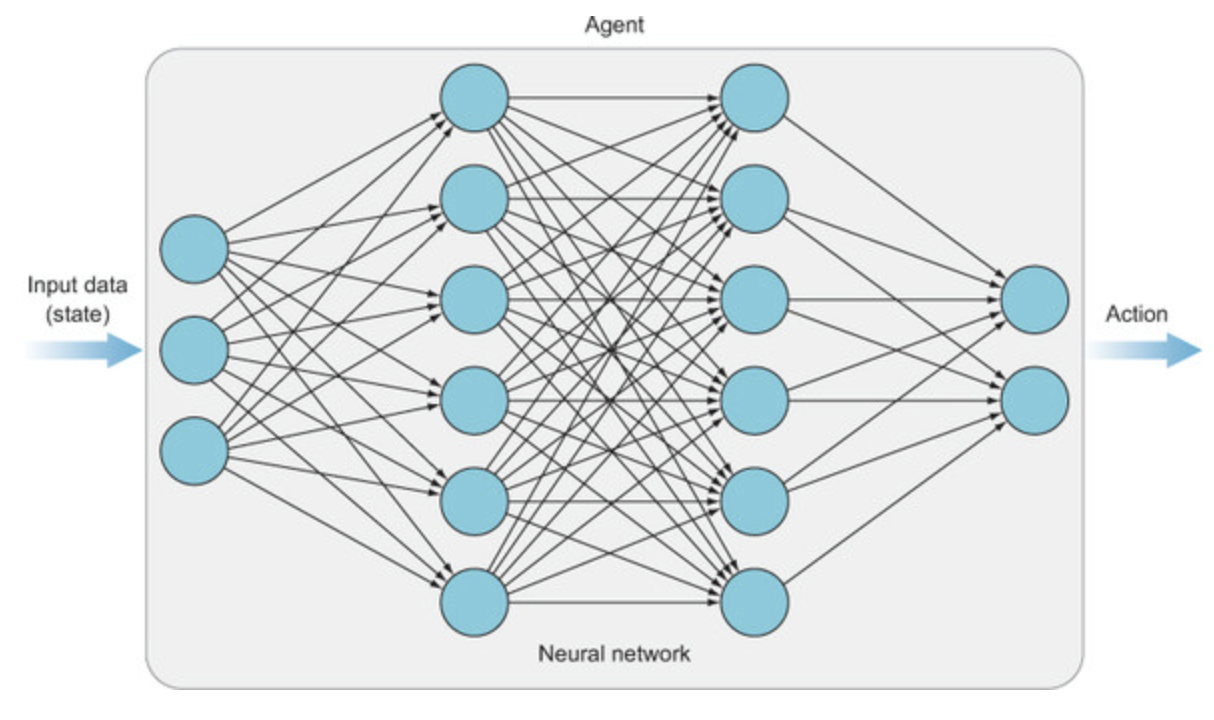

DeepMind’s DQN algorithm successfully learned how to play seven Atari games with only the raw pixels as input and the player’s score as the objective to maximize. Previous algorithms, such as IBM’s Deep Blue, needed to be fine-tuned to play a specific game.

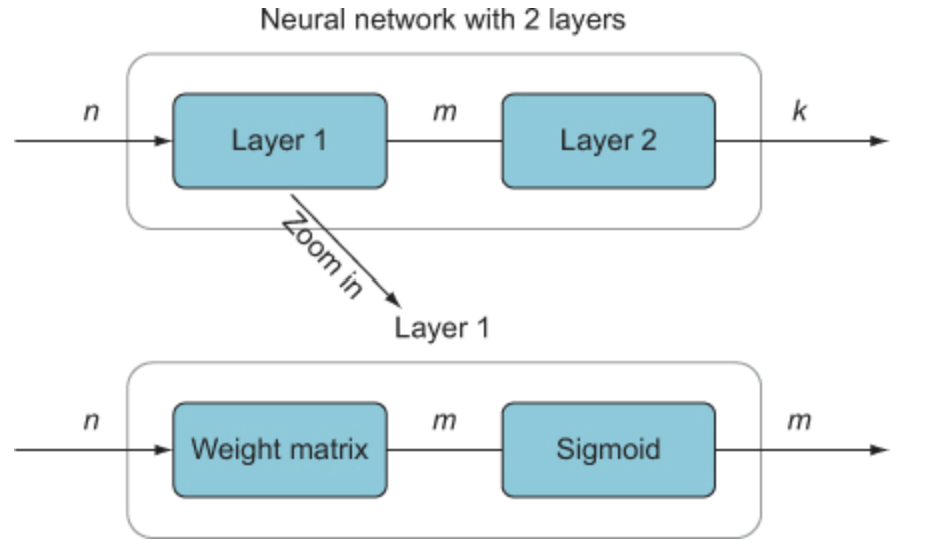

A neural network is a kind of machine learning model composed of multiple “layers” that perform a **matrix-vector** multiplication followed by the application of a nonlinear “activation” function. The matrices of the neural network are the model’s learnable parameters and are often called the “weights” of the neural network.

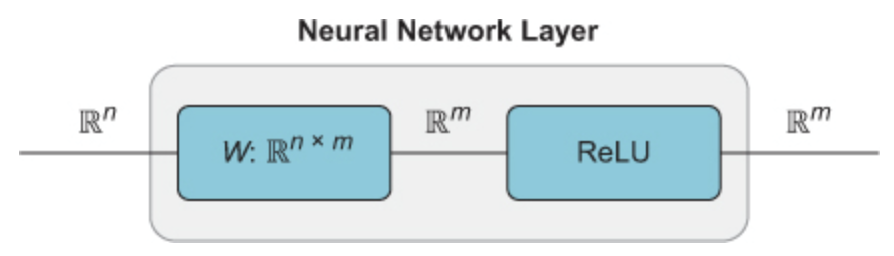

ReLU is favored in most scenarios due to its simplicity, non-saturation for positive inputs, and effectiveness in combating the vanishing gradient problem.
However, Sigmoid remains valuable in tasks like binary classification or when a bounded output range (0 to 1) is desired.

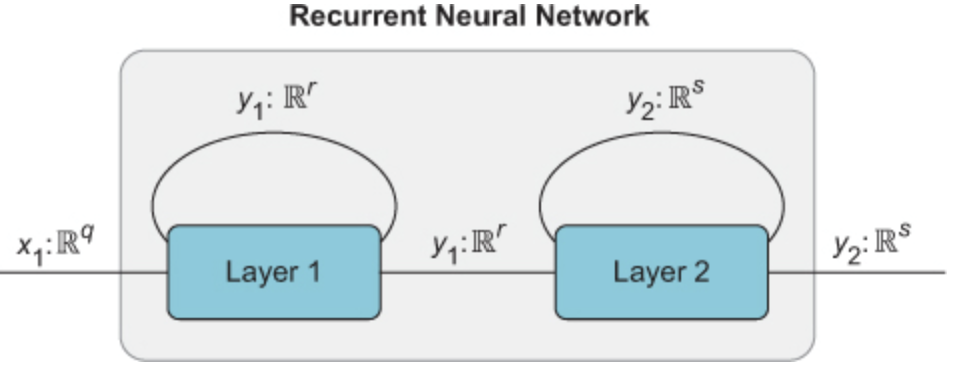

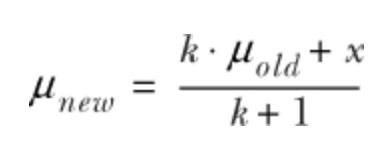

M_new is the average updated reward;

k is the total number of plays or times an arm has been pulled/actions taken

x is the new reward value

M_old is the average reward value till now

k + 1 is the new total number of plays


# Lesson 1: Train your first Deep Reinforcement Learning Agent


In this notebook, you'll train your **first Deep Reinforcement Learning agent** a Lunar Lander agent that will learn to **land correctly on the Moon 🌕**. Using [Stable-Baselines3](https://stable-baselines3.readthedocs.io/en/master/) a Deep Reinforcement Learning library.



### The environment 🎮

- [LunarLander-v2](https://gymnasium.farama.org/environments/box2d/lunar_lander/)

### The library used 📚

- [Stable-Baselines3](https://stable-baselines3.readthedocs.io/en/master/)



<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit1/RL_process_game.jpg" alt="The RL process" width="100%">

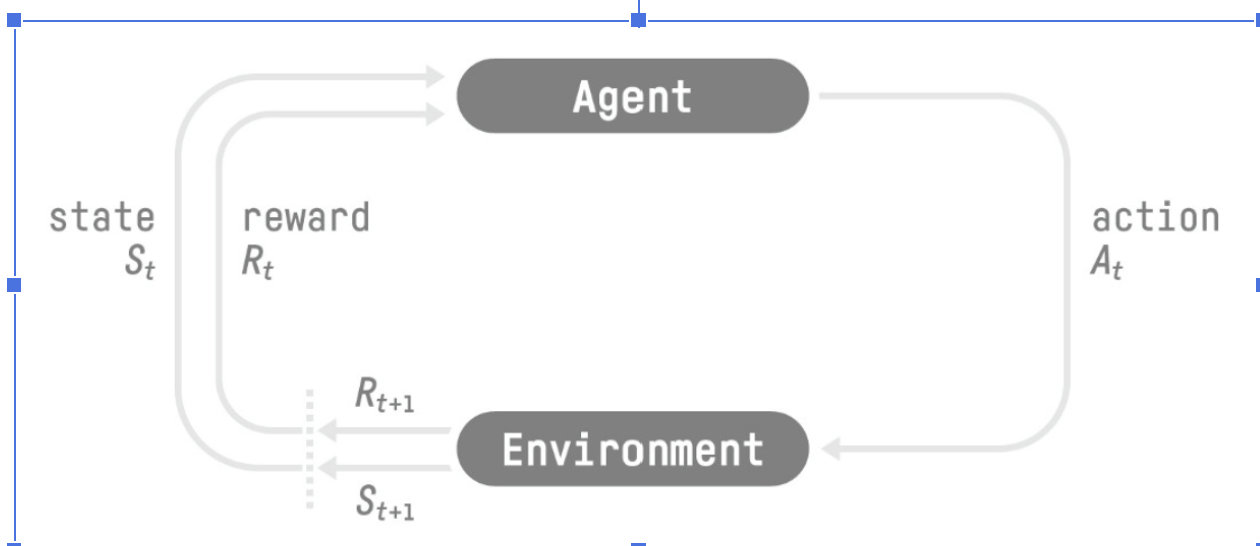

Based on that state S0, the Agent takes action A0

​The agent’s goal is to maximize its **cumulative reward**, called the **expected return**.

You’ll see that the RL process is called a **Markov Decision Process** (MDP). Markov Property implies that our agent needs only the current state to decide what action to take and not the history of all the states and actions they took before.


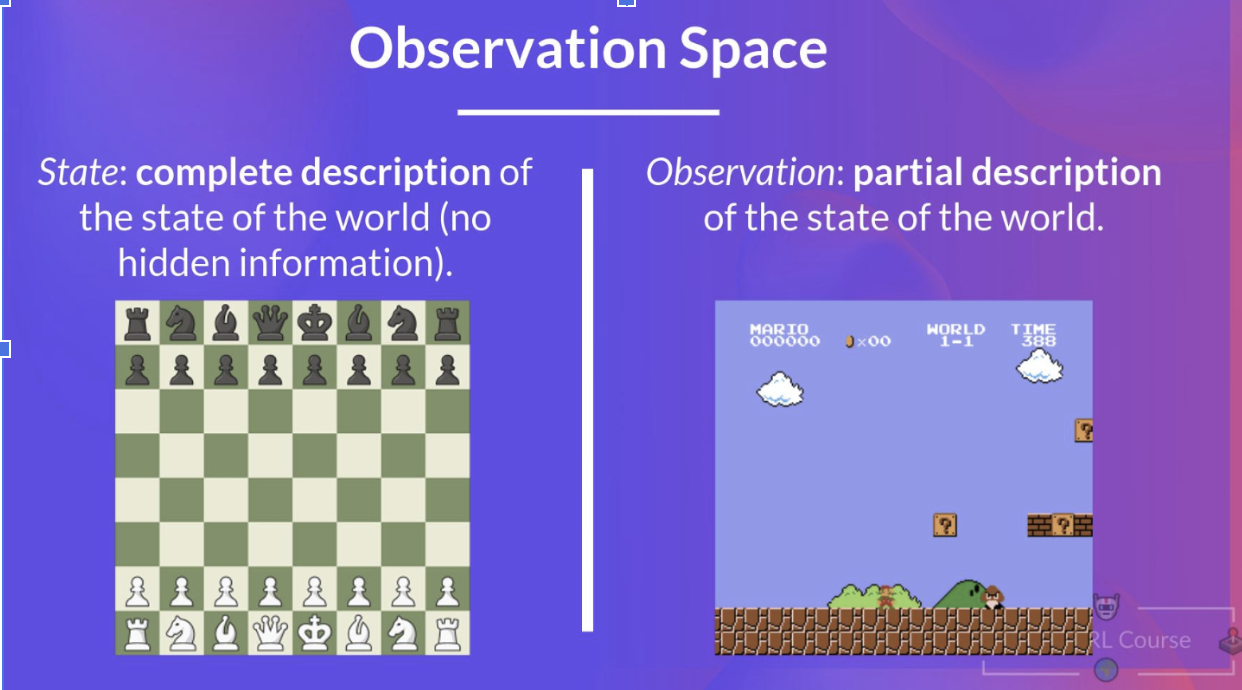

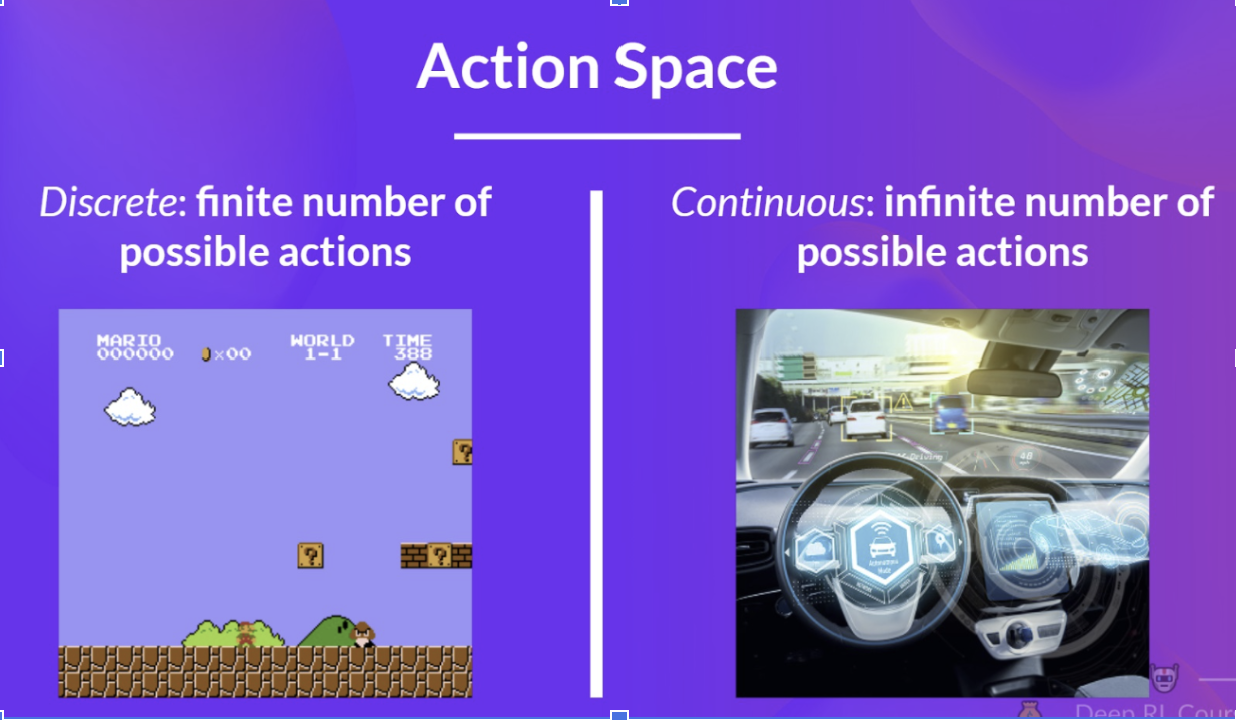

In a **Chess** game, we have access to the whole board information, so we receive a state from the environment. In other words, the environment is fully observed.

Observation o: is a partial description of the state. In a partially observed environment.

In **Super Mario Bros**, we are in a partially observed environment. We receive an observation since we only see a part of the level.

Two spaces:

i) Discrete space: the number of possible actions is finite.
In Super Mario Bros, we have only 4 possible actions: left, right, up (jumping) and down (crouching).

ii) Continuous space: the number of possible actions is infinite.
A Self Driving Car agent has an infinite number of possible actions since it can turn left 20°, 21,1°, 21,2°, honk, turn right 20°…


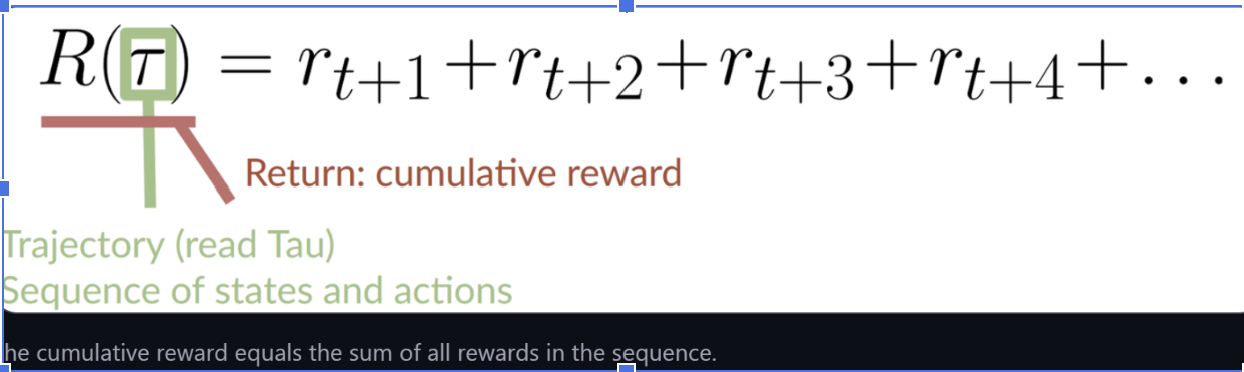

However, in **reality**, we can’t just add them like that. The rewards that come sooner (at the beginning of the game) are more likely to happen since they are more predictable than the long-term future reward.


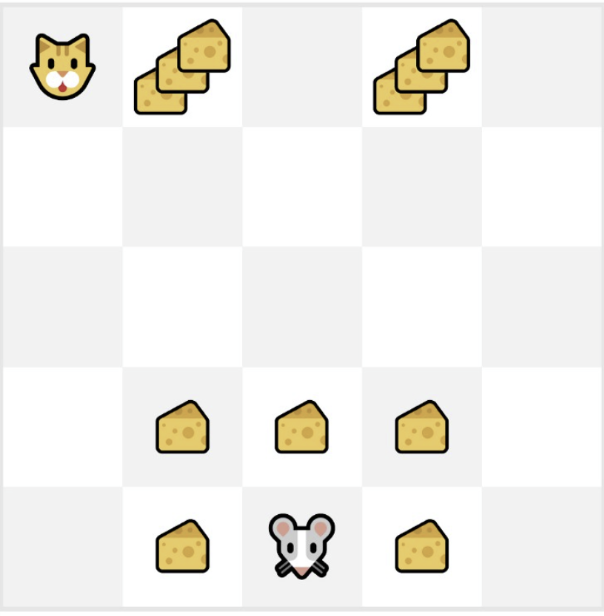

The mouse’s **goal** is to eat the maximum amount of cheese before being eaten by the cat.
As we can see in the diagram, it’s more probable to eat the cheese near it than the cheese close to the cat (the closer we are to the cat, the more dangerous it is).

Consequently, the reward near the cat, even if it is bigger (more cheese), will be more discounted since we’re not really sure we’ll be able to eat it.

To discount the rewards, we proceed like this:

We define a discount rate called gamma. It must be between 0 and 1. Most of the time between 0.95 and 0.99.
The larger the gamma, the smaller the discount. This means our agent cares more about the long-term reward.
On the other hand, the smaller the gamma, the bigger the discount. This means our agent cares more about the short term reward (the nearest cheese).



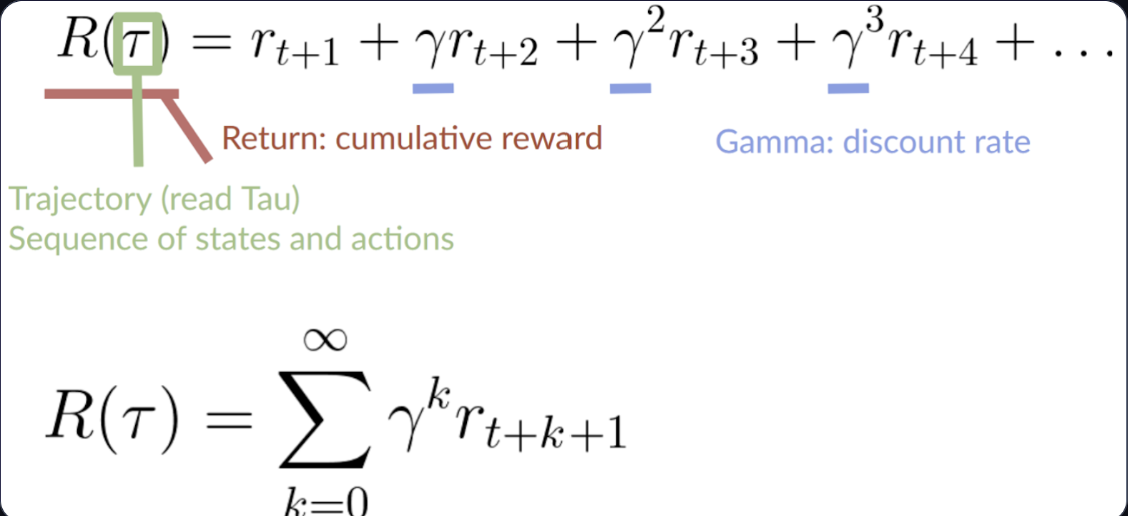

Our **discounted expected cumulative reward** is:

Each reward will be discounted by **gamma** to the exponent of the time step. As the time step increases, the cat gets closer to us, so the future reward is less and less likely to happen.
So Gamma will be less, which means Discount for future rewards is more.


We can have **two** types of **tasks**: **episodic and continuing**.

**Episodic tasks:** It has a starting and ending point. Not continuous. It is of episodes: State, action, reward, new state.
Think about Super Mario Bros: an episode begins at the launch of a new Mario Level and ends when you’re killed or you have reached the end of the level.

**Continuous:** It continues forever, no terminal state. In this case, the agent must learn how to choose the best actions and simultaneously interact with the environment. For instance, an agent that does automated stock trading. For this task, there is no starting point and terminal state. The agent keeps running until we decide to stop it.


**Exploration** is exploring the environment by trying random actions in order to find more information about the environment.

**Exploitation** is exploiting known information to maximize the reward.


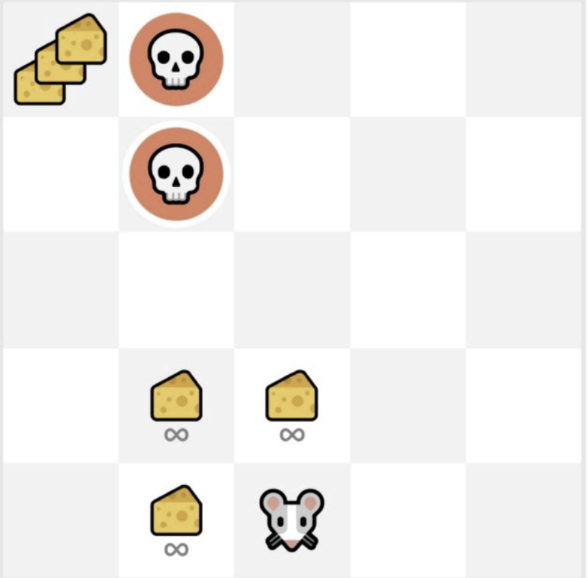

In this game, our mouse can have an infinite amount of small cheese (+1 each). But at the top of the maze, there is a gigantic sum of cheese (+1000).

However, if we only focus on exploitation, our agent will never reach the gigantic sum of cheese. Instead, it will only exploit the nearest source of rewards, even if this source is small (exploitation).

But if our agent does a little bit of exploration, it can discover the big reward (the pile of big cheese).
This is what we call the exploration/exploitation trade-off. We need to balance how much we explore the environment and how much we exploit what we know about the environment.

think of a real problem: the choice of picking a restaurant:
Exploitation: You go to the same one that you know is good every day and take the risk to miss another better restaurant.

Exploration: Try restaurants you never went to before, with the risk of having a bad experience but the probable opportunity of a fantastic experience.


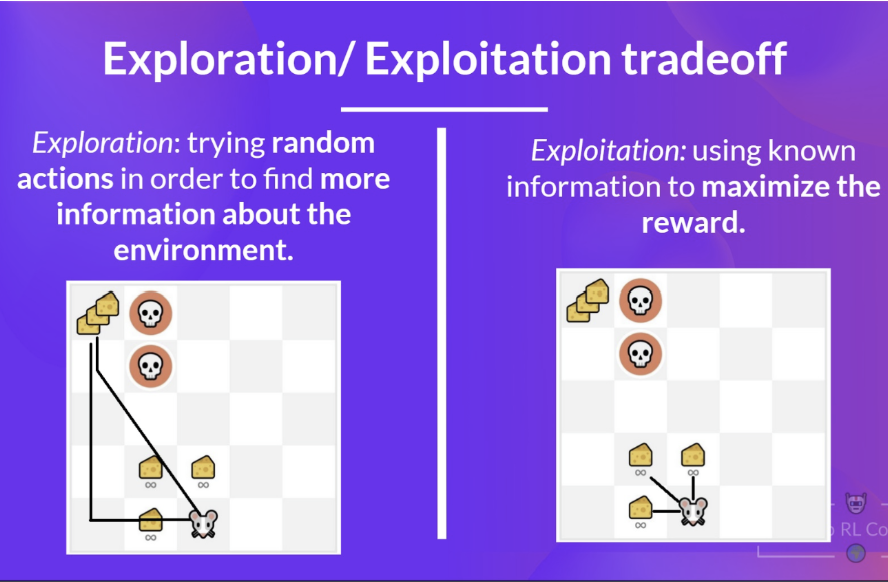

The **Policy π:** the agent’s **brain**: How to train an RL agent?

The Policy π is the brain of our Agent, it’s the function that tells us what action to take given the state we are in. So it defines the agent’s behavior at a given time.

This Policy is the function we want to learn, our goal is to find the **optimal policy** π*, the policy that maximizes expected return. We find this π* through training.

There are **two** approaches to train our agent to find this optimal policy π*:

i) Directly, by teaching the agent to learn which action to take, given the current state: **Policy-Based Methods**.

ii) Indirectly, teach the agent to learn which state is more valuable and then take the action that leads to the more valuable states: **Value-Based Methods**.


In Policy-Based methods, we learn a policy function directly.

This function will define a mapping from each state to the best corresponding action. Alternatively, it could define a probability distribution over the set of possible actions at that state.


We have two types of policies:

i) Deterministic: a policy at a given state will always return the same action.


Action = policy(state)


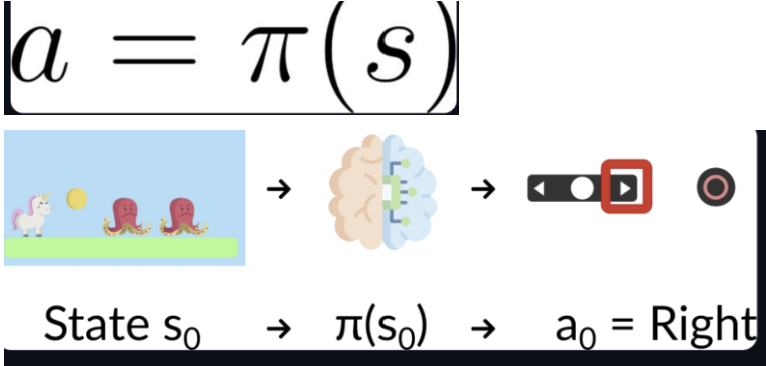

ii) Stochastic: Outputs a probability distribution over the actions.

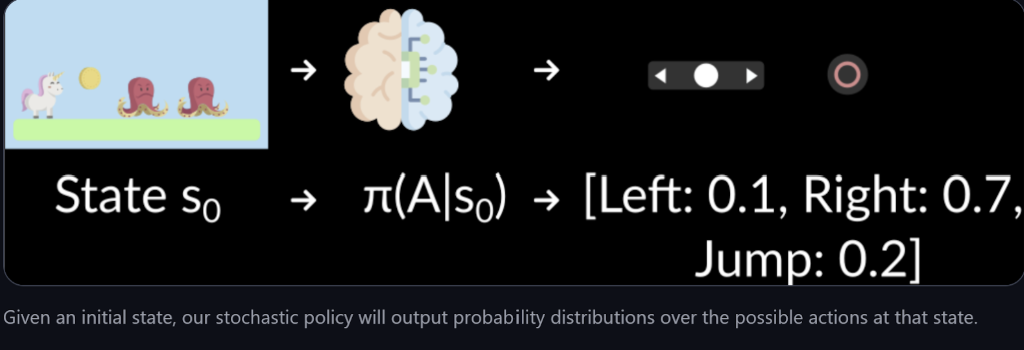

**Value-based methods:**

In value-based methods, instead of learning a policy function, we learn a value function that maps a state to the expected value of being at that state.

The value of a state is the expected discounted return the agent can get if it starts in that state, and then acts according to our policy.

“Act according to our policy” just means that our policy is “going to the state with the highest value”.


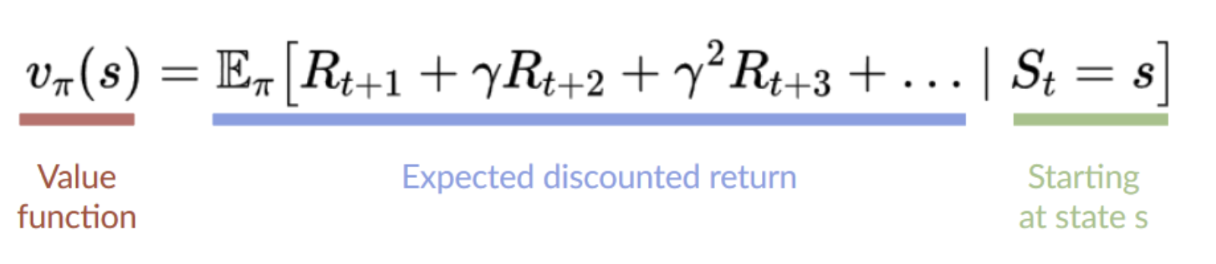

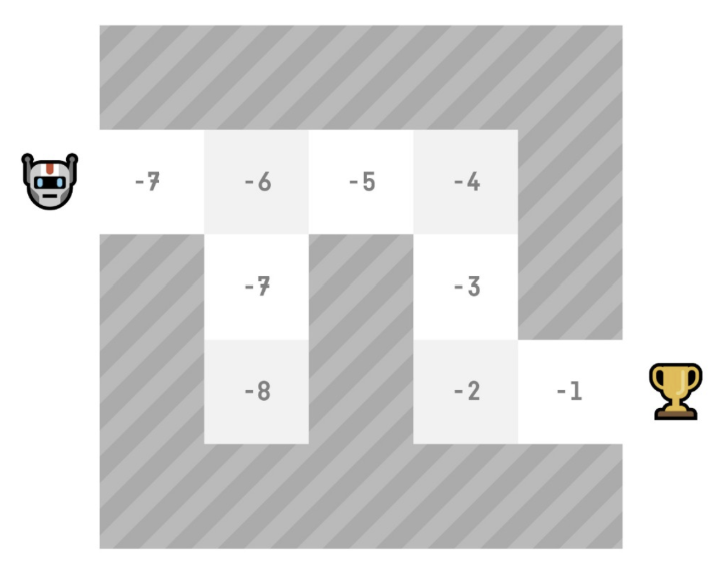

Thanks to our value function, at each step our policy will select the state with the biggest value defined by the value function: -7, then -6, then -5 (and so on) to attain the goal.

There are **two value-based algorithms**: Q-Learning (classic Reinforcement Learning) and then Deep Q-Learning.

In the first approach, we use a traditional algorithm to create a Q table that helps us find what action to take for each state. In the second approach, we will use a Neural Network (to approximate the Q value).


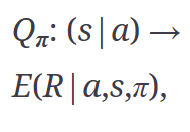

Qπ is a function that maps a pair, (s, a), of a state, s, and an action, a, to the expected reward of taking action a in state s, given that we’re using the policy (or “strategy”) π.


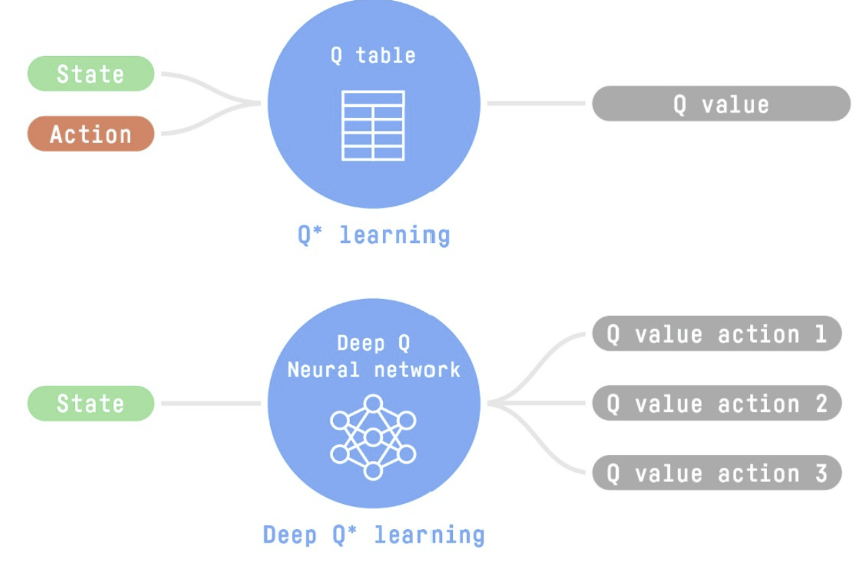

A small recap on what we learned in the first Unit:

- Reinforcement Learning is a **computational approach to learning from actions**. We build an agent that learns from the environment by **interacting with it through trial and error** and receiving rewards (negative or positive) as feedback.

- The goal of any RL agent is to **maximize its expected cumulative reward** (also called expected return) because RL is based on the _reward hypothesis_, which is that all goals can be described as the maximization of an expected cumulative reward.

- The RL process is a **loop that outputs a sequence of state, action, reward, and next state**.

- To calculate the expected cumulative reward (expected return), **we discount the rewards**: the rewards that come sooner (at the beginning of the game) are more probable to happen since they are more predictable than the long-term future reward.

- To solve an RL problem, you want to **find an optimal policy**; the policy is the "brain" of your AI that will tell us what action to take given a state. The optimal one is the one that gives you the actions that max the expected return.

There are **two** ways to find your optimal policy:

- By **training your policy directly**: policy-based methods.
- By **training a value function** that tells us the expected return the agent will get at each state and use this function to define our policy: value-based methods.

- Finally, we spoke about Deep RL because **we introduce deep neural networks to estimate the action to take (policy-based) or to estimate the value of a state (value-based) hence the name "deep."**

### Q-Learning: 

What is Q-learning, you ask?


Q-learning is an off-policy, value-based reinforcement learning algorithm that uses a temporal difference (TD) approach to learn the optimal action-value function, known as the Q-function. This function estimates the expected cumulative reward (or "quality") of taking a specific action in a given state and then following the optimal policy. Q-learning updates its estimates at every step based on observed rewards and future value predictions, storing these values in a Q-table—a lookup table mapping state-action pairs to their expected value. The algorithm improves over time by comparing its predictions to actual outcomes, adjusting the Q-values to make better decisions in the future. Unlike reward, which is immediate feedback from the environment, value reflects long-term expected rewards from a state or action. Once trained, the Q-table encodes the optimal policy by indicating the best action to take at each state.



![QValue](upd1.png)


The hyperparameter α  is the learning_rate to control how quickly we want the algorithm to learn from each move; a small value means it will only make small updates at each step. 

The discount factor γ is between 0 and 1 that controls how much our agent discounts future rewards when making a decision.


![Description](upd11.png)

![Description](upd12.png)

![Description](upd13.png)

The idea is that, with an initial value of ɛ = 1.0:

With probability 1 — ɛ : we do exploitation (aka our agent selects the action with the highest state-action pair value).
With probability ɛ: we do exploration (trying random action).
At the beginning of the training, the probability of doing exploration will be huge since ɛ is very high, so most of the time, we’ll explore. But as the training goes on, and consequently our Q-table gets better and better in its estimations, we progressively reduce the epsilon value since we will need less and less exploration and more exploitation.

![Description](upd14.png)

#### Step 4: Update Q(St, At)

![Description](upd15.png)


TD stands for Temporal Difference.

It’s a core concept in reinforcement learning (especially Q-learning), and refers to learning from the difference between predicted and actual rewards over time.

![Description](upd16.png)

Off-policy vs On-policy
The difference is subtle:

Off-policy: using a different policy for acting (inference) and updating (training).
For instance, with Q-Learning, the epsilon-greedy policy (acting policy), is different from the greedy policy that is used to select the best next-state action value to update our Q-value (updating policy).

![Description](upd17.png)


On-policy: using the same policy for acting and updating.
For instance, with Sarsa, another value-based algorithm, the epsilon-greedy policy selects the next state-action pair, not a greedy policy.

As we continue exploring and exploiting the environment and updating Q-values using the TD target, the Q-table will give us a better and better approximation. At the end of the training, we’ll get an estimate of the optimal Q-function.

#### Q Learning to Deep Q Learning:
    
The problem is that Q-Learning is a tabular method. This becomes a problem if the states and actions spaces are not small enough to be represented efficiently by arrays and tables. In other words: it is not scalable. 


Atari environments have an observation space with a shape of **(210, 160, 3)**, which corresponds to:

- 210 pixels in height  
- 160 pixels in width  
- 3 color channels (RGB)

Each pixel can have **256** possible values (from 0 to 255), so the total number of possible observations is:

\[
256^{(210 \times 160 \times 3)} = 256^{100800}
\]

That means the observation space contains an **astronomically large number** of possible image frames!


Therefore, the state space is gigantic; due to this, creating and updating a Q-table for that environment would not be efficient. In this case, the best idea is to approximate the Q-values using a parametrized Q-function Qθ(s,a).

This neural network will approximate, given a state, the different Q-values for each possible action at that state. And that’s exactly what Deep Q-Learning does.


![Description](upd18.png)

In a Gridworld game, Unlike us humans who live in what appears to be a continuous flow of time, the algorithm lives in a discrete world, so something needs to happen at each discrete time step. At time step 1 the algorithm will “look” at the game board and make a decision about what action to take. Then the game board will be updated, and so on.

![Description](upd2.png)

Remember, the algorithm is not predicting the reward we will get after taking a particular action; it’s predicting the expected value (the expected rewards), which is the long-term average reward we will get from taking an action in a state and then continuing to behave according to our policy π. We do this for several (perhaps all) possible actions we could take in this state.

![Description](upd3.png)

![Description](upd4.png)

Schematic of Q-learning with Gridworld. The Q function accepts a state and an action, and returns the predicted reward (value) of that state-action pair. After taking the action, we observe the reward, and using the update formula, we use this observation to update the Q function so it makes better predictions.

Now we run the algorithm using St+1 as input and figure out which action our algorithm predicts has the highest value. We’ll call this value Q(St+1,a). To be clear, this is a single value that reflects the highest predicted Q value, given our new state and all possible actions.

Now we have all the pieces we need to update the algorithm’s parameters. We’ll perform one iteration of training using some loss function, such as mean-squared error, to minimize the difference between the predicted value from our algorithm and the target prediction of Q(St,At) + α*[Rt+1 + γ*maxQ(St+1,A) – Q(St,At)].

![Description](upd5.png)

The original Q function accepts a state-action pair and returns the value of that state-action pair—a single number. DeepMind used a modified vector-valued Q function that accepts a state and returns a vector of state-action values, one for each possible action given the input state. The vector-valued Q function is more efficient, since you only need to compute the function once for all the actions.

Instead recast the Q function as a vector-valued function, meaning that instead of computing and returning a single Q value for a single state-action pair, it will compute the Q values for all actions, given some state, and return the vector of all those Q values. So we might represent this new version of the Q function as QA(s), where the subscript A denotes the set of all possible actions 

In the case of Gridworld, there are only four possible actions (up, down, left, right) so the output layer will produce 4-dimensional vectors. We can then directly use the output of the neural network to decide what action to take using some action selection procedure, such as a simple epsilon-greedy approach or a softmax selection policy.

![Description](upd6.png)

Instead of using a static ε value, we will initialize it to a large value (i.e., 1, so we’ll start with a completely random selection of actions) and we will slowly decrement it so that after a certain number of iterations, the ε value will rest at some small value. In this way, we will allow the algorithm to explore and learn a lot in the beginning, but then it will settle into maximizing rewards by exploiting what it has learned. 

We can build our own Neural Network which will act as a Q function.


![Description](upd7.png)


![Description](upd8.png)


String diagram for our DQN. The input is a 64-length Boolean vector, and the output is a 4-length real vector of Q values.

#### Neural network Q function

import numpy as np
import torch
from Gridworld import Gridworld
import random
from matplotlib import pylab as plt
 
l1 = 64
l2 = 150
l3 = 100
l4 = 4
 
model = torch.nn.Sequential(
    torch.nn.Linear(l1, l2),
    torch.nn.ReLU(),
    torch.nn.Linear(l2, l3),
    torch.nn.ReLU(),
    torch.nn.Linear(l3,l4)
)
loss_fn = torch.nn.MSELoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
 
gamma = 0.9
epsilon = 1.0

## Install dependencies and create a virtual screen

The first step is to install the dependencies, we’ll install multiple ones.

- `gymnasium[box2d]`: Contains the LunarLander-v2 environment
- `stable-baselines3[extra]`: The deep reinforcement learning library.
- `huggingface_sb3`: Additional code for Stable-baselines3 to load and upload models from the Hugging Face 🤗 Hub.

To make things easier, we created a script to install all these dependencies.

In [3]:
import moviepy
import imageio
from huggingface_sb3 import package_to_hub
import gymnasium as gym


/users/PLS0167/rjahan01/Deep_Reinforcement_Learning_Lesson_1/rl-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
# !pip install -r https://raw.githubusercontent.com/huggingface/deep-rl-class/main/notebooks/unit1/requirements-unit1.txt
# !pip install gym[box2d] pyopengl ffmpeg-python imageio

During the notebook, we'll need to generate a replay video. To do so, with colab, **we need to have a virtual screen to be able to render the environment** (and thus record the frames).

Hence the following cell will install virtual screen libraries and create and run a virtual screen 🖥

## Import the packages

One additional library we import is huggingface_hub **to be able to upload and download trained models from the hub**.

The Hugging Face Hub works as a central place where anyone can share and explore models and datasets. It has versioning, metrics, visualizations and other features that will allow you to easily collaborate with others.

You can see here all the Deep reinforcement Learning models available here https://huggingface.co/models?pipeline_tag=reinforcement-learning&sort=downloads



In [4]:
import gymnasium

from huggingface_sb3 import load_from_hub, package_to_hub
from huggingface_hub import notebook_login # To log to our Hugging Face account to be able to upload models to the Hub.

from stable_baselines3 import PPO #PPO, or Proximal Policy Optimization, is a reinforcement learning (RL) algorithm known for its stability and performance in training agents, particularly in complex environments. It's a policy gradient method, meaning it directly learns a policy (a strategy for taking actions) without explicitly learning a value function. PPO is often favored for its balance of data efficiency and ease of implementation
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

## Understand Gymnasium and how it works

The library containing our environment is called Gymnasium, which is common in RL examples.

Gymnasium is the **new version of Gym library**.

The Gymnasium library provides two things:

- An interface that allows you to **create RL environments**.
- A **collection of environments** (gym-control, atari, box2D...).

Let's look at an example, but first let's recall the RL loop.

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit1/RL_process_game.jpg" alt="The RL process" width="100%">

At each step:
- Our Agent receives a **state (S0)** from the **Environment** — we receive the first frame of our game (Environment).
- Based on that **state (S0),** the Agent takes an **action (A0)** — our Agent will move to the right.
- The environment transitions to a **new** **state (S1)** — new frame.
- The environment gives some **reward (R1)** to the Agent — we’re not dead *(Positive Reward +1)*.


With Gymnasium:

1️⃣ We create our environment using `gymnasium.make()`

2️⃣ We reset the environment to its initial state with `observation = env.reset()`

At each step:

3️⃣ Get an action using our model (in our example we take a random action)

4️⃣ Using `env.step(action)`, we perform this action in the environment and get
- `observation`: The new state (st+1)
- `reward`: The reward we get after executing the action
- `terminated`: Indicates if the episode terminated (agent reach the terminal state)
- `truncated`: Introduced with this new version, it indicates a timelimit or if an agent go out of bounds of the environment for instance.
- `info`: A dictionary that provides additional information (depends on the environment).


If the episode is terminated:
- We reset the environment to its initial state with `observation = env.reset()`

**Let's look at an example!**


In [5]:
import gymnasium as gym

# First, we create our environment called LunarLander-v2
env = gym.make("LunarLander-v2")

# Then we reset this environment
observation, info = env.reset()

for _ in range(200):
  # Take a random action
  action = env.action_space.sample() #action_space used in the gym environment is used to define characteristics of the action space of the environment.
  print("Action taken:", action)

  # Do this action in the environment and get
  # next_state, reward, terminated, truncated and info
  observation, reward, terminated, truncated, info = env.step(action)

  # If the game is terminated (in our case we land, crashed) or truncated (timeout)
  if terminated or truncated:
      # Reset the environment
      print("Environment is reset")
      observation, info = env.reset()

env.close()

Action taken: 2
Action taken: 3
Action taken: 1
Action taken: 0
Action taken: 0
Action taken: 3
Action taken: 2
Action taken: 1
Action taken: 2
Action taken: 1
Action taken: 0
Action taken: 2
Action taken: 0
Action taken: 2
Action taken: 3
Action taken: 3
Action taken: 3
Action taken: 0
Action taken: 3
Action taken: 3
Action taken: 0
Action taken: 1
Action taken: 2
Action taken: 3
Action taken: 3
Action taken: 1
Action taken: 0
Action taken: 3
Action taken: 2
Action taken: 0
Action taken: 3
Action taken: 0
Action taken: 2
Action taken: 1
Action taken: 3
Action taken: 3
Action taken: 1
Action taken: 3
Action taken: 2
Action taken: 2
Action taken: 2
Action taken: 2
Action taken: 3
Action taken: 2
Action taken: 1
Action taken: 3
Action taken: 1
Action taken: 2
Action taken: 3
Action taken: 3
Action taken: 3
Action taken: 2
Action taken: 3
Action taken: 2
Action taken: 3
Action taken: 2
Action taken: 1
Action taken: 3
Action taken: 1
Action taken: 0
Action taken: 3
Action taken: 3
Action t

## Create the LunarLander environment and understand how it works

### [The environment 🎮](https://gymnasium.farama.org/environments/box2d/lunar_lander/)

In this first tutorial, we’re going to train our agent, a [Lunar Lander](https://gymnasium.farama.org/environments/box2d/lunar_lander/), **to land correctly on the moon**. To do that, the agent needs to learn **to adapt its speed and position (horizontal, vertical, and angular) to land correctly.**

---


💡 A good habit when you start to use an environment is to check its documentation

👉 https://gymnasium.farama.org/environments/box2d/lunar_lander/

---


Let's see what the Environment looks like:


In [6]:
# We create our environment with gym.make("<name_of_the_environment>")
env = gym.make("LunarLander-v2")
env.reset()
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space Shape", env.observation_space.shape)
print("Sample observation", env.observation_space.sample()) # Get a random observation

_____OBSERVATION SPACE_____ 

Observation Space Shape (8,)
Sample observation [76.890366   89.78009     2.0287104  -3.4360783  -1.2666584  -0.7595339
  0.9232366   0.30397248]


We see with `Observation Space Shape (8,)` that the observation is a vector of size 8, where each value contains different information about the lander:
- Horizontal pad coordinate (x)
- Vertical pad coordinate (y)
- Horizontal speed (x)
- Vertical speed (y)
- Angle
- Angular speed
- If the left leg contact point has touched the land (boolean)
- If the right leg contact point has touched the land (boolean)


In [7]:
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.n)
print("Action Space Sample", env.action_space.sample()) # Take a random action


 _____ACTION SPACE_____ 

Action Space Shape 4
Action Space Sample 2


The action space (the set of possible actions the agent can take) is discrete with 4 actions available:

- Action 0: Do nothing,
- Action 1: Fire left orientation engine,
- Action 2: Fire the main engine,
- Action 3: Fire right orientation engine.

Reward function (the function that will give a reward at each timestep) :

After every step a reward is granted. The total reward of an episode is the **sum of the rewards for all the steps within that episode**.

For each step, the reward:

- Is increased/decreased the closer/further the lander is to the landing pad.
-  Is increased/decreased the slower/faster the lander is moving.
- Is decreased the more the lander is tilted (angle not horizontal).
- Is increased by 10 points for each leg that is in contact with the ground.
- Is decreased by 0.03 points each frame a side engine is firing.
- Is decreased by 0.3 points each frame the main engine is firing.

The episode receive an **additional reward of -100 or +100 points for crashing or landing safely respectively.**

An episode is **considered a solution if it scores at least 200 points.**

#### Vectorized Environment

- We create a vectorized environment (a method for stacking multiple independent environments into a single environment) of 16 environments, this way, **we'll have more diverse experiences during the training.**

In [8]:
# Create the environment
from stable_baselines3.common.env_util import make_vec_env

env = make_vec_env('LunarLander-v2', n_envs=16)

## Create the Model
- We have studied our environment and we understood the problem: **being able to land the Lunar Lander to the Landing Pad correctly by controlling left, right and main orientation engine**. Now let's build the algorithm we're going to use to solve this Problem.

- To do so, we're going to use our first Deep RL library, [Stable Baselines3 (SB3)](https://stable-baselines3.readthedocs.io/en/master/).

- SB3 is a set of **reliable implementations of reinforcement learning algorithms in PyTorch**.

---

A good habit when using a new library is to dive first on the documentation: https://stable-baselines3.readthedocs.io/en/master/ and then try some tutorials.

----

To solve this problem, we're going to use SB3 **PPO**. [PPO (aka Proximal Policy Optimization) is one of the SOTA (state of the art) Deep Reinforcement Learning algorithms that you'll study during this course](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#example%5D).

PPO is a combination of:
- *Value-based reinforcement learning method*: learning an action-value function that will tell us the **most valuable action to take given a state and action**.
- *Policy-based reinforcement learning method*: learning a policy that will **give us a probability distribution over actions**.

Stable-Baselines3 is easy to set up:

1️⃣ You **create your environment** (in our case it was done above)

2️⃣ You define the **model you want to use and instantiate this model** `model = PPO("MlpPolicy")`

3️⃣ You **train the agent** with `model.learn` and define the number of training timesteps

```
# Create environment
env = gym.make('LunarLander-v2')

# Instantiate the agent
model = PPO('MlpPolicy', env, verbose=1)
# Train the agent
model.learn(total_timesteps=int(2e5))
```



PPO is an on-policy, actor-critic algorithm that optimizes a policy directly, whereas Q-learning is a value-based method that learns an optimal action-value function (Q-function). We will use Double DQN neural network (Q learning algorithm) to implement Super Mario Bro game in Second less.

A policy function, πState → P(Action|State), accepts a state and returns the best action. More precisely, it will return a probability distribution over the actions, and we can sample from this distribution to select actions.

Policy gradient methods offer a few advantages over value prediction methods like DQN. One is that, as we already discussed, we no longer have to worry about devising an action-selection strategy like epsilon-greedy; instead, we directly sample actions from the policy.

There are many different flavors of policy gradient methods. We will start with the stochastic policy gradient method. With a stochastic policy gradient, the output of our neural network is an action vector that represents a probability distribution.

A stochastic policy function accepts a state and returns a probability distribution over actions. It is stochastic because it returns a probability distribution over actions rather than returning a deterministic, single action.

![Description](upd9.png)

If the environment is stationary, which is when the distribution of states and rewards is constant, and we use a deterministic strategy, we’d expect the probability distribution to eventually converge to a degenerate probability distribution.

When dealing with discrete probability distributions, all the probabilities must sum to 1, so a degenerate distribution is one where all outcomes are assigned 0 probability except for one, which is assigned 1.


![Description](upd10.png)

A deterministic policy function, often represented by the Greek character pi, takes a state and returns a specific action to take, unlike a stochastic policy, which returns a probability distribution over actions.

A policy gradient method is a reinforcement learning approach that tries to directly learn a policy by generally using a parameterized function as a policy function (e.g., a neural network) and training it to increase the probability of actions based on the observed rewards.

In [9]:
# TODO: Define a PPO MlpPolicy architecture
# We use MultiLayerPerceptron (MLPPolicy) because the input is a vector,
# if we had frames as input we would use CnnPolicy
model = #TODO


Using cuda device


#### Solution

In [23]:
# SOLUTION
# We added some parameters to accelerate the training
# model = PPO(
#     policy = 'MlpPolicy',
#     env = env,
#     n_steps = 1024,
#     batch_size = 64,
#     n_epochs = 4,
#     gamma = 0.999,
#     gae_lambda = 0.98,
#     ent_coef = 0.01,
#     verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


## Train the PPO agent
- Let's train our agent for 1,000,000 timesteps, don't forget to use GPU on Colab. It will take approximately ~20min, but you can use fewer timesteps if you just want to try it out.
- During the training, take a break you deserved it

In [10]:
# TODO: Train it for 1,000,000 timesteps
model.learn(total_timesteps=1000000)
# TODO: Specify file name for model and save the model to file
model_name = "ppo-LunarLander-v2"
model.save(model_name)



---------------------------------
| rollout/           |          |
|    ep_len_mean     | 91.4     |
|    ep_rew_mean     | -177     |
| time/              |          |
|    fps             | 3522     |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 16384    |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 92.8         |
|    ep_rew_mean          | -159         |
| time/                   |              |
|    fps                  | 2731         |
|    iterations           | 2            |
|    time_elapsed         | 11           |
|    total_timesteps      | 32768        |
| train/                  |              |
|    approx_kl            | 0.0050263386 |
|    clip_fraction        | 0.0404       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   | -0.000144    |
|    learning_r



ep_len_mean: 933
→ On average, each episode lasted about 933 steps. Since the max length of an episode in LunarLander-v2 is 1000 steps, this shows your agent is surviving almost until the end—great sign!

ep_rew_mean: 150
→ Average episode reward is 150, which is a strong result. For LunarLander-v2, anything above 200 is considered "solved", so 150 is close to expert-level.


fps: 889
→ The agent processed about 889 environment steps per second.

iterations: 62
→ PPO performs training in iterations (each ~16,384 steps here [n_steps * n_envs]). You've completed 62 such iterations.

time_elapsed: 1141
→ Total time taken for training = 1141 seconds (19 minutes).

total_timesteps: 1015808
→ Total number of environment steps used in training is slightly above 1 million.

1000000/16384 = 61 * 16384 = 999,424 iterations
This is still under 1,000,000. So PPO must run one more iteration, pushing the count to:


62 * 16,384 = 1,015,808 timesteps

Why Doesn't It Stop Exactly at 1,000,000?
Because PPO needs full rollouts for stability and batch updates.
Cannot do partial rollouts (e.g., “just give me 576 more steps”).

#### Solution

## Evaluate the agent 📈
- Remember to wrap the environment in a [Monitor](https://stable-baselines3.readthedocs.io/en/master/common/monitor.html).
- Now that our Lunar Lander agent is trained 🚀, we need to **check its performance**.
- Stable-Baselines3 provides a method to do that: `evaluate_policy`.
- To fill that part you need to [check the documentation](https://stable-baselines3.readthedocs.io/en/master/guide/examples.html#basic-usage-training-saving-loading)
- In the next step,  we'll see **how to automatically evaluate and share your agent to compete in a leaderboard, but for now let's do it ourselves**


💡 When you evaluate your agent, you should not use your training environment but create an evaluation environment.

In [11]:
# TODO: Evaluate the agent
# Create a new environment for evaluation
env = gym.make('LunarLander-v2', render_mode="rgb_array")


# Evaluate the model with 10 evaluation episodes and deterministic=True

mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
# Print the results
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")






mean_reward=265.93 +/- 16.640850883861216


In [12]:
# Save a video of the trained agent landing

render_env = gym.make("LunarLander-v2", render_mode="rgb_array")
obs, _ = render_env.reset()
frames = []
done = False

while not done:
    frames.append(render_env.render())  # Capture frame
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, _ = render_env.step(action)

render_env.close()

# Save video
video_path = "ppo_lunar_lander.mp4"
imageio.mimsave(video_path, frames, fps=30)
print(f" Video saved: {video_path}")

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 400) to (608, 400) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


 Video saved: ppo_lunar_lander.mp4


#### Solution

## Publish our trained model on the Hub 🔥
Now that we saw we got good results after the training, we can publish our trained model on the hub 🤗 with one line of code.

📚 The libraries documentation 👉 https://github.com/huggingface/huggingface_sb3/tree/main#hugging-face--x-stable-baselines3-v20

Here's an example of a Model Card (with Space Invaders):

By using `package_to_hub` **you evaluate, record a replay, generate a model card of your agent and push it to the hub**.

This way:
- You can **showcase our work** 🔥
- You can **visualize your agent playing** 👀
- You can **share with the community an agent that others can use** 💾
- You can **access a leaderboard 🏆 to see how well your agent is performing compared to your classmates** 👉 https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard


To be able to share your model with the community there are three more steps to follow:

1️⃣ (If it's not already done) create an account on Hugging Face ➡ https://huggingface.co/join

2️⃣ Sign in and then, you need to store your authentication token from the Hugging Face website.
- Create a new token (https://huggingface.co/settings/tokens) **with write role**

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/create-token.jpg" alt="Create HF Token">

- Copy the token
- Run the cell below and paste the token

In [16]:
from huggingface_hub import notebook_login
notebook_login()


In [17]:
notebook_login()
!git config --global credential.helper store

If you don't want to use a Google Colab or a Jupyter Notebook, you need to use this command instead: `huggingface-cli login`

3️⃣ We're now ready to push our trained agent to the 🤗 Hub 🔥 using `package_to_hub()` function

Let's fill the `package_to_hub` function:
- `model`: our trained model.
- `model_name`: the name of the trained model that we defined in `model_save`
- `model_architecture`: the model architecture we used, in our case PPO
- `env_id`: the name of the environment, in our case `LunarLander-v2`
- `eval_env`: the evaluation environment defined in eval_env
- `repo_id`: the name of the Hugging Face Hub Repository that will be created/updated `(repo_id = {username}/{repo_name})`

💡 **A good name is {username}/{model_architecture}-{env_id}**

- `commit_message`: message of the commit

In [18]:
import gymnasium as gym
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env

from huggingface_sb3 import package_to_hub

## TODO: Define a repo_id
## repo_id is the id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
repo_id ="rayajahan/ppo-LunarLander-v2"

# TODO: Define the name of the environment
env_id ="LunarLander-v2"

# Create the evaluation env and set the render_mode="rgb_array"
eval_env = DummyVecEnv([lambda: Monitor(gym.make(env_id, render_mode="rgb_array"))])


# TODO: Define the model architecture we used
model_architecture = "PPO"

## TODO: Define the commit message
commit_message = "Chill out and upload the agent"

# method save, evaluate, generate a model card and record a replay video of your agent before pushing the repo to the hub
package_to_hub(model=model, # Our trained model
               model_name=model_name, # The name of our trained model
               model_architecture=model_architecture, # The model architecture we used: in our case PPO
               env_id=env_id, # Name of the environment
               eval_env=eval_env, # Evaluation Environment
               repo_id=repo_id, # id of the model repository from the Hugging Face Hub (repo_id = {organization}/{repo_name} for instance ThomasSimonini/ppo-LunarLander-v2
               commit_message=commit_message)

ℹ This function will save, evaluate, generate a video of your agent,
create a model card and push everything to the hub. It might take up to 1min.
This is a work in progress: if you encounter a bug, please open an issue.
Saving video to /tmp/slurmtmp.36848954/tmpe87wmn79/-step-0-to-step-1000.mp4
MoviePy - Building video /tmp/slurmtmp.36848954/tmpe87wmn79/-step-0-to-step-1000.mp4.
MoviePy - Writing video /tmp/slurmtmp.36848954/tmpe87wmn79/-step-0-to-step-1000.mp4



sh: ffmpeg: command not found                                             


MoviePy - Done !
MoviePy - video ready /tmp/slurmtmp.36848954/tmpe87wmn79/-step-0-to-step-1000.mp4
ℹ Pushing repo rayajahan/ppo-LunarLander-v2 to the Hugging Face Hub


policy.optimizer.pth:   0%|          | 0.00/88.4k [00:00<?, ?B/s]
policy.pth:   0%|          | 0.00/43.8k [00:00<?, ?B/s]

pytorch_variables.pth:   0%|          | 0.00/864 [00:00<?, ?B/s]


Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]



policy.pth: 100%|██████████| 43.8k/43.8k [00:00<00:00, 639kB/s]/s]
policy.optimizer.pth: 100%|██████████| 88.4k/88.4k [00:00<00:00, 731kB/s]
pytorch_variables.pth: 100%|██████████| 864/864 [00:00<00:00, 8.79kB/s]



ppo-LunarLander-v2.zip: 100%|██████████| 148k/148k [00:00<00:00, 1.12MB/s]



Upload 4 LFS files: 100%|██████████| 4/4 [00:00<00:00, 15.79it/s]


ℹ Your model is pushed to the Hub. You can view your model here:
https://huggingface.co/rayajahan/ppo-LunarLander-v2/tree/main/


CommitInfo(commit_url='https://huggingface.co/rayajahan/ppo-LunarLander-v2/commit/bf89bf9a209b5ed01cb19501a51bb7b783097e9e', commit_message='Chill out and upload the agent', commit_description='', oid='bf89bf9a209b5ed01cb19501a51bb7b783097e9e', pr_url=None, repo_url=RepoUrl('https://huggingface.co/rayajahan/ppo-LunarLander-v2', endpoint='https://huggingface.co', repo_type='model', repo_id='rayajahan/ppo-LunarLander-v2'), pr_revision=None, pr_num=None)

Congrats 🥳 you've just trained and uploaded your first Deep Reinforcement Learning agent. The script above should have displayed a link to a model repository such as https://huggingface.co/osanseviero/test_sb3. When you go to this link, you can:
* See a video preview of your agent at the right.
* Click "Files and versions" to see all the files in the repository.
* Click "Use in stable-baselines3" to get a code snippet that shows how to load the model.
* A model card (`README.md` file) which gives a description of the model

Under the hood, the Hub uses git-based repositories (don't worry if you don't know what git is), which means you can update the model with new versions as you experiment and improve your agent.

Compare the results of your LunarLander-v2 with your classmates using the leaderboard 🏆 👉 https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard

## Load a saved LunarLander model from the Hub 🤗
Thanks to [ironbar](https://github.com/ironbar) for the contribution.

Loading a saved model from the Hub is really easy.

You go to https://huggingface.co/models?library=stable-baselines3 to see the list of all the Stable-baselines3 saved models.
1. You select one and copy its repo_id

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit1/copy-id.png" alt="Copy-id"/>

2. Then we just need to use load_from_hub with:
- The repo_id
- The filename: the saved model inside the repo and its extension (*.zip)

Because the model I download from the Hub was trained with Gym (the former version of Gymnasium) we need to install shimmy a API conversion tool that will help us to run the environment correctly.

Shimmy Documentation: https://github.com/Farama-Foundation/Shimmy

In [ ]:
!pip install shimmy

In [ ]:
from huggingface_sb3 import load_from_hub
repo_id = "Classroom-workshop/assignment2-omar" # The repo_id
filename = "ppo-LunarLander-v2.zip" # The model filename.zip

# When the model was trained on Python 3.8 the pickle protocol is 5
# But Python 3.6, 3.7 use protocol 4
# In order to get compatibility we need to:
# 1. Install pickle5 (we done it at the beginning of the colab)
# 2. Create a custom empty object we pass as parameter to PPO.load()
custom_objects = {
            "learning_rate": 0.0,
            "lr_schedule": lambda _: 0.0,
            "clip_range": lambda _: 0.0,
}

checkpoint = load_from_hub(repo_id, filename)
model = PPO.load(checkpoint, custom_objects=custom_objects, print_system_info=True)

Let's evaluate this agent:

In [ ]:
#@title
eval_env = Monitor(gym.make("LunarLander-v2"))
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

## Some additional challenges 🏆
The best way to learn **is to try things by your own**! As you saw, the current agent is not doing great. As a first suggestion, you can train for more steps. With 1,000,000 steps, we saw some great results!

In the [Leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard) you will find your agents. Can you get to the top?

Here are some ideas to achieve so:
* Train more steps
* Try different hyperparameters for `PPO`. You can see them at https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#parameters.
* Check the [Stable-Baselines3 documentation](https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html) and try another model such as DQN.
* **Push your new trained model** on the Hub 🔥

**Compare the results of your LunarLander-v2 with your classmates** using the [leaderboard](https://huggingface.co/spaces/huggingface-projects/Deep-Reinforcement-Learning-Leaderboard) 🏆

Is moon landing too boring for you? Try to **change the environment**, why not use MountainCar-v0, CartPole-v1 or CarRacing-v0? Check how they work [using the gym documentation](https://www.gymlibrary.dev/) and have fun 🎉.

________________________________________________________________________
Congrats on finishing this chapter! That was the biggest one, **and there was a lot of information.**

If you’re still feel confused with all these elements...it's totally normal! **This was the same for me and for all people who studied RL.**

Take time to really **grasp the material before continuing and try the additional challenges**. It’s important to master these elements and have a solid foundations.

Naturally, during the course, we’re going to dive deeper into these concepts but **it’s better to have a good understanding of them now before diving into the next chapters.**



Next time, in the bonus unit 1, you'll train Huggy the Dog to fetch the stick.

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/notebooks/unit1/huggy.jpg" alt="Huggy"/>

## Keep learning, stay awesome 🤗